In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = pd.read_csv('/content/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean up data

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic.Age.mean(),inplace=True)

<Figure size 432x288 with 0 Axes>

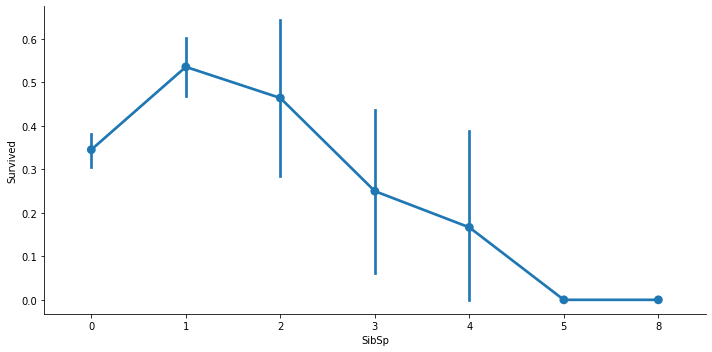

<Figure size 432x288 with 0 Axes>

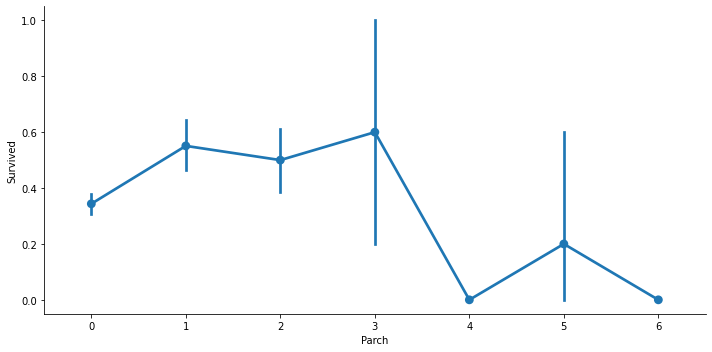

In [ ]:
for i,col in enumerate(['SibSp','Parch']):
  plt.figure()
  sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2)

For both features, they have the same survival response rate.

If you have more siblings and spouses or parents and children, you're less likely to survive.

In [ ]:
#Combining both the columns into one

titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [ ]:
#Drop unnecesary variables

titanic.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [ ]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [ ]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

Survival rate is decreasing when cabin is missing

In [ ]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [ ]:
#Convert sex to numeric

gender_num = {'male':0, 'female':1}

titanic.Sex = titanic.Sex.map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [ ]:
#Drop unnecesary variables

titanic.drop(['Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)

## Train, validation, test set

In [ ]:
from sklearn.model_selection import train_test_split

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [ ]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

##BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
import joblib
import pandas
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def print_results(results):
  print('BEST PARAMS: {}\n'.format(results.best_params_))

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean,std,params in zip(means,stds,results.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5,50,250,500],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01,0.1,1,10,100]
}

cv = GridSearchCV(gb, parameters,cv=5)
cv.fit(X_train,y_train)
#print_results(cv)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [ ]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [ ]:
#Write out pickled model

joblib.dump(cv.best_estimator_,'/content/GB_model.pkl')

['/content/GB_model.pkl']

# BAGGING

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf = RandomForestClassifier()
parameters_rf = {
    'n_estimators': [5,50,250,500],
    'max_depth': [4,8,16,32,None]
}

cv = GridSearchCV(rf, parameters_rf,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250, 500]})

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=5)

In [ ]:
joblib.dump(cv.best_estimator_,'/content/RF_model.pkl')

['/content/RF_model.pkl']

# STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
estimators = [('gb',GradientBoostingClassifier()),('rf',RandomForestClassifier())]

StackingClassifier(estimators=estimators).get_params()

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None

In [ ]:
sc = StackingClassifier(estimators=estimators)

In [ ]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'gb__n_estimators': [50,100],
    'rf__n_estimators': [50,100],
    'final_estimator': [LogisticRegression(C=0.1),
                        LogisticRegression(C=10),
                        LogisticRegression(C=1)],
    'passthrough': [True, False]
}

cv = GridSearchCV(sc, parameters,cv=5)
cv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('gb',
                                                       GradientBoostingClassifier()),
                                                      ('rf',
                                                       RandomForestClassifier())]),
             param_grid={'final_estimator': [LogisticRegression(C=0.1),
                                             LogisticRegression(C=10),
                                             LogisticRegression(C=1)],
                         'gb__n_estimators': [50, 100],
                         'passthrough': [True, False],
                         'rf__n_estimators': [50, 100]})

In [ ]:
cv.best_estimator_

StackingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(C=0.1))

In [ ]:
joblib.dump(cv.best_estimator_,'/content/ST_model.pkl')

['/content/ST_model.pkl']

# COMPARISON

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
gb_mdl = joblib.load('/content/GB_model.pkl')
rf_mdl = joblib.load('/content/RF_model.pkl')
stacked_mdl = joblib.load('/content/ST_model.pkl')

In [ ]:
from time import time

def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(str(model).split('(')[0],
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [ ]:
for mdl in {gb_mdl, rf_mdl, stacked_mdl}:
  evaluate_model(mdl,X_val,y_val)

GradientBoostingClassifier -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 7.4ms
RandomForestClassifier -- Accuracy: 0.787 / Precision: 0.765 / Recall: 0.6 / Latency: 5.8ms
StackingClassifier -- Accuracy: 0.82 / Precision: 0.824 / Recall: 0.646 / Latency: 19.3ms


In [ ]:
evaluate_model(stacked_mdl, X_test,y_test)

StackingClassifier -- Accuracy: 0.821 / Precision: 0.879 / Recall: 0.671 / Latency: 45.9ms
